<img src="images/JHI_STRAP_Web.png" style="width: 150px; float: right;">
# 07 - Programming for `UniProt`

## Table of Contents

1. [Introduction](#introduction)
2. [Python imports](#imports)
3. [Running a remote `UniProt` query](#uniprot)
  1. [Connecting to `UniProt`](#connect)
  2. [Constructing a query](#query)
  3. [Perform the query](#search)
  4. [EXAMPLE: Putting it together](#example01)
4. [Advanced queries](#advanced)
  1. [`key:value` queries](#keyvalue)
  2. [Exercise 01](#ex01)
  3. [Combining queries](#combine)
  4. [Exercise 02](#ex02)  
4. [Processing query results](#processing)
  1. [Tabular](#tabular)
  2. [Excel](#excel)  

<a id="introduction"></a>
## Introduction

The `UniProt` browser interface is very powerful, but you will have noticed that even the most complex queries can be converted into a single string that describes the search being made of the `UniProt` databases. This string is generated for you, and placed into the search field at the top of the `UniProt` webpage every time you run a search.

It can be tedious and time-consuming to point-and-click your way through a large number of browser-based searches, but by using the `UniProt` webservice, the search strings you've already seen, and a Python module called `bioservices`, we can compose and run as many searches as we like using computer code, and pull the results of those searches

This notebook presents examples of methods for using `UniProt` programmatically, via a webservice, and you will be controlling the searches using Python code in this notebook.

<div class="alert-success">
<b>There are a number of advantages to this approach:</b>
</div>

* It is easy to set up repeatable searches for many sequences, or collections of sequences
* It is easy to read in the search results and conduct downstream analyses that add value to your search

Where it is not practical to submit a large number of simultaneous queries via a web form (because it is tiresome to point-and-click over and over again), this can be handled programmatically instead. You have the opportunity to change custom options to help refine your query, compared to the website interface. If you need to repeat a query, it can be trivial to get the same settings every time, if you use a programmatic approach.

<a id="imports"></a>
## Python imports

In [1]:
# Show plots as part of the notebook
%pylab inline

# Standard library packages
import io
import os

# Import Seaborn for graphics and plotting
import seaborn as sns

# Import bioservices module, to run remote UniProt queries
from bioservices import UniProt

# Import Pandas, so we can use dataframes
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


<a id="uniprot"></a>
## Running a remote `UniProt` query

There are three key steps to running a remote `UniProt` query with `bioservices`:

1. Make a link to the `UniProt` webservice
2. Construct a query string
3. Send the query to `UniProt`, and catch the result in a variable

Once the search result is caught, it can be processed in any way you like, written to a file, or ignored.

<a id="connect"></a>
### Connecting to `UniProt`

To open a connection to `UniProt`, you make an *instance* of the `UniProt()` *class* from `bioservices`. This is persistent, so once it is created, you can interact with it over and over again. To make the instance, you need to assign `UniProt()` to a variable.

```
service = UniProt() # it is good practice to have a meaningful variable name
```

<a id="query"></a>
### Constructing a query

`UniProt` allows for the construction of complex searches by combining *fields*. A full discussion is beyond the scope of this lesson, but you will have seen in [notebook 06](06-uniprot_browser.ipynb) that the searches you constructed by pointing and clicking on the `UniProt` website were converted into text in the search field at the top. 

To describe the format briefly: there are a set of defined *keys* - keywords that indicate the specific type of data you want to search in (such as `host`, `annotation`, or sequence `length`), and these are combined with a particular *value* you want to search for (such as `mouse`, or `40674`) in a `key:value` pair, separated by a colon, such as `host:mouse` or `ec:3.2.1.23`.

* `UniProt` query fields: [http://www.uniprot.org/help/query-fields](http://www.uniprot.org/help/query-fields)

If you provide a string, instead of a `key:value` pair, `UniProt` will search in all *fields* for your search term.

Programmatically, we construct the query as a *string*, e.g.

```
query = "Q9AJE3"  # this query means we want to look in all fields for Q9AJE3
```

<a id="search"></a>
### Perform the query

To send the query to `UniProt`, you will use the `.search()` *method* of your active instance of the `UniProt()` *class*. If you have assigned this instance to the variable `service` (as above), then you can run the query with the line:

```
result = service.search(query)  # Run a query and catch the output in result
```

In the line above, the output of the search (i.e. your results) are stored in a variable called `result`. It is good practice to make variable names short and descriptive - this makes your code easier to read.

<a id="example01"></a>
### EXAMPLE: Putting it together

The code in the cell below uses the example code above to create an instance of the `UniProt()` class, and use it to submit a pre-stored query to the `UniProt` service, then catch the result in a variable called `result`. The `print()` statement then shows us what the result looks like, as returned by the service.

In [2]:
# Make a link to the UniProt webservice
service = UniProt()

# Build a query string
query = "Q9AJE3"

# Send the query to UniProt, and catch the search result in a variable
result = service.search(query)

# Inspect the result
print(result)

Entry	Entry name	Status	Protein names	Gene names	Organism	Length
Q9AJE3	CYC2_KITGR	reviewed	Terpentetriene synthase (EC 4.2.3.36)	cyc2	Kitasatospora griseola (Streptomyces griseolosporeus)	311



The `UniProt()` instance defined in the cell above is *persistent*, so you can reuse it to make another query, as in the cell below:

In [3]:
# Make a new query string, and run a remote search at UniProt
new_query = "Q01844"
new_result = service.search(new_query)

# Inspect the result
print(new_result)

Entry	Entry name	Status	Protein names	Gene names	Organism	Length
Q01844	EWS_HUMAN	reviewed	RNA-binding protein EWS (EWS oncogene) (Ewing sarcoma breakpoint region 1 protein)	EWSR1 EWS	Homo sapiens (Human)	656
Q12933	TRAF2_HUMAN	reviewed	TNF receptor-associated factor 2 (EC 2.3.2.27) (E3 ubiquitin-protein ligase TRAF2) (RING-type E3 ubiquitin transferase TRAF2) (Tumor necrosis factor type 2 receptor-associated protein 3)	TRAF2 TRAP3	Homo sapiens (Human)	501
Q13077	TRAF1_HUMAN	reviewed	TNF receptor-associated factor 1 (Epstein-Barr virus-induced protein 6)	TRAF1 EBI6	Homo sapiens (Human)	416
O15162	PLS1_HUMAN	reviewed	Phospholipid scramblase 1 (PL scramblase 1) (Ca(2+)-dependent phospholipid scramblase 1) (Erythrocyte phospholipid scramblase) (MmTRA1b)	PLSCR1	Homo sapiens (Human)	318
Q99873	ANM1_HUMAN	reviewed	Protein arginine N-methyltransferase 1 (EC 2.1.1.319) (Histone-arginine N-methyltransferase PRMT1) (Interferon receptor 1-bound protein 4)	PRMT1 HMT2 HRMT1L2 IR1B4	Homo sapiens (Hu

<a id="advanced"></a>
## Advanced queries

The examples above built queries that were simple strings. They did not exploit the `key:value` search structure, or combine search terms. In this section, you will explore some queries that use the `UniProt` query fields, and combine them into powerful, filtering searches.

<a id="keyvalue"></a>
### `key:value` queries

As noted above (and at [http://www.uniprot.org/help/query-fields](http://www.uniprot.org/help/query-fields)) particular values of specific data can be requested by using `key:value` pairs to restrict searches to named *fields* in the `UniProt` database.

As a first example, you will note that the result returned for the query `"Q01844"` has multiple entries. Only one of these is the sequence with `accession` value equal to `"Q01844"`, but the other entries make reference to this sequence somewhere in their database record. If we want to restrict our result only to the particular entry `"Q01844"`, we can specify the field we want to search as `accession`, and build the following query:

```
query = "accession:Q01844"  # specify a search on the accession field
```

Note that we can use the same variable name `query` as earlier. The code below runs the search and shows the output:

In [4]:
# Make a new query string, and run a remote search at UniProt
query = "accession:Q01844"
result = service.search(query)

# Inspect the result
print(result)

Entry	Entry name	Status	Protein names	Gene names	Organism	Length
Q01844	EWS_HUMAN	reviewed	RNA-binding protein EWS (EWS oncogene) (Ewing sarcoma breakpoint region 1 protein)	EWSR1 EWS	Homo sapiens (Human)	656



<div class="alert-success">
<b>By using this and other `key:value` constructions, we can refine our searches to give us only the entries we're interested in</b>

<img src="images/exercise.png" style="width: 100px; float: left;">
<a id="ex01"></a>
### Exercise 01 (10min)

Using `key:value` searches, can you find and download sets of entries for proteins that satisfy the following requirements (**HINT** the links to the `UniProt` query fields may be helpful, here):

<br></br>
<div class="alert-danger">
<ul>
<li> Have publications authored by someone with the surname Broadhurst
<li> Have protein length between 9000aa and 9010aa
<li> Derive from the taipan snake
<li> Have been found in the wing
</ul>
</div>

In [5]:
# SOLUTION - EXERCISE 01
queries = ["author:broadhurst", "length:[9000 TO 9010]", "organism:taipan", "tissue:wing"]

for query in queries:
    print("\n%s" % query)
    print("=" * len(query))
    result = service.search(query)
    print(result)


author:broadhurst
Entry	Entry name	Status	Protein names	Gene names	Organism	Length
P63159	HMGB1_RAT	reviewed	High mobility group protein B1 (Amphoterin) (Heparin-binding protein p30) (High mobility group protein 1) (HMG-1)	Hmgb1 Hmg-1 Hmg1	Rattus norvegicus (Rat)	215
P03956	MMP1_HUMAN	reviewed	Interstitial collagenase (EC 3.4.24.7) (Fibroblast collagenase) (Matrix metalloproteinase-1) (MMP-1) [Cleaved into: 22 kDa interstitial collagenase; 27 kDa interstitial collagenase]	MMP1 CLG	Homo sapiens (Human)	469
P83917	CBX1_MOUSE	reviewed	Chromobox protein homolog 1 (Heterochromatin protein 1 homolog beta) (HP1 beta) (Heterochromatin protein p25) (M31) (Modifier 1 protein)	Cbx1 Cbx	Mus musculus (Mouse)	185
P10515	ODP2_HUMAN	reviewed	Dihydrolipoyllysine-residue acetyltransferase component of pyruvate dehydrogenase complex, mitochondrial (EC 2.3.1.12) (70 kDa mitochondrial autoantigen of primary biliary cirrhosis) (PBC) (Dihydrolipoamide acetyltransferase component of pyruvate dehydrogenase co

<a id="combine"></a>
### Combining queries

Combining terms in a `UniProt` query can be as straightforward as putting them in the same string, separated by a space. For example:

```
query = "organism:rabbit tissue:eye"
```

will search for all entries deriving from rabbits that are found in the eye

In [6]:
# Combine queries for rabbit (organism) and eye (tissue), and search
query = "organism:rabbit tissue:eye"
result = service.search(query)
print(result)

Entry	Entry name	Status	Protein names	Gene names	Organism	Length
Q866N2	MYOC_RABIT	reviewed	Myocilin (Trabecular meshwork-induced glucocorticoid response protein) [Cleaved into: Myocilin, N-terminal fragment (Myocilin 20 kDa N-terminal fragment); Myocilin, C-terminal fragment (Myocilin 35 kDa N-terminal fragment)]	MYOC TIGR	Oryctolagus cuniculus (Rabbit)	490
P14755	CRYL1_RABIT	reviewed	Lambda-crystallin (EC 1.1.1.45) (L-gulonate 3-dehydrogenase) (Gul3DH)	CRYL1 GUL3DH	Oryctolagus cuniculus (Rabbit)	319
A4L9J0	MIP_RABIT	reviewed	Lens fiber major intrinsic protein (Aquaporin-0)	MIP	Oryctolagus cuniculus (Rabbit)	263
Q9TV70	DHDH_RABIT	reviewed	Trans-1,2-dihydrobenzene-1,2-diol dehydrogenase (EC 1.3.1.20) (D-xylose 1-dehydrogenase) (D-xylose-NADP dehydrogenase) (EC 1.1.1.179) (Dimeric dihydrodiol dehydrogenase) (Ory2DD) (Fragment)	DHDH 2DD	Oryctolagus cuniculus (Rabbit)	329
P41316	CRYAB_RABIT	reviewed	Alpha-crystallin B chain (Alpha(B)-crystallin)	CRYAB	Oryctolagus cuniculus (Rabbit)	175
P0

<img src="images/exercise.png" style="width: 100px; float: left;">
<a id="ex02"></a>
### Exercise 02 (10min)

Using `key:value` searches, can you find and download sets of entries for proteins that satisfy the following requirements (**HINT** the links to the `UniProt` query fields may be helpful, here):

<br></br>
<div class="alert-danger">
<ul>
<li> Found in sheep spleen
<li> Have "rxlr" in their name, have a publication with author name Pritchard, and are between 70aa and 80aa in length
<li> Derive from a quokka and have had their annotations manually reviewed
<li> Are found in cell membranes of horse heart tissue, and have had their annotations manually reviewed
</ul>
</div>

In [7]:
# SOLUTION - EXERCISE 02
queries = ["organism:sheep tissue:spleen",
           "author:pritchard name:rxlr length:[70 TO 80]",
           "organism:quokka reviewed:yes",
           "go:membrane organism:horse tissue:heart reviewed:yes"]

for query in queries:
    print("\n%s" % query)
    print("=" * len(query))
    result = service.search(query)
    print(result)


organism:sheep tissue:spleen
Entry	Entry name	Status	Protein names	Gene names	Organism	Length
P23907	PRIO_SHEEP	reviewed	Major prion protein (PrP) (CD antigen CD230)	PRNP PRP SIP	Ovis aries (Sheep)	256
Q95229	PDGFB_SHEEP	reviewed	Platelet-derived growth factor subunit B (PDGF subunit B) (PDGF-2) (Platelet-derived growth factor B chain) (Platelet-derived growth factor beta polypeptide)	PDGFB	Ovis aries (Sheep)	241
Q5I2M4	TLR9_SHEEP	reviewed	Toll-like receptor 9 (CD antigen CD289)	TLR9	Ovis aries (Sheep)	1029
O77727	K1C15_SHEEP	reviewed	Keratin, type I cytoskeletal 15 (Cytokeratin-15) (CK-15) (Keratin-15) (K15)	KRT15	Ovis aries (Sheep)	453
A2P2G3	A2P2G3_SHEEP	unreviewed	VH region (Fragment)	VH	Ovis aries (Sheep)	142
A2P2I3	A2P2I3_SHEEP	unreviewed	VH region (Fragment)	VH	Ovis aries (Sheep)	142
A2P2G7	A2P2G7_SHEEP	unreviewed	VH region (Fragment)	VH	Ovis aries (Sheep)	140
A2P2I2	A2P2I2_SHEEP	unreviewed	VH region (Fragment)	VH	Ovis aries (Sheep)	145
A2P2H7	A2P2H7_SHEEP	unreviewed	VH region 

<a id="boolean"></a>
### Combining terms with Boolean logic

Boolean logic allows you to combine search terms with each other in arbitrary ways using three operators, specifying whether:

* both terms are required (`AND`) **NOTE:** this is implicitly what you have been doing in the examples above
* either term is allowed (`OR`)
* a term is disallowed (`NOT`)

Searches are read from left-to right, but the logic of a search can be controlled by placing the combinations you want to resolve first in parentheses (`()`). Combining these operators can build some extremely powerful searches. For example, to get all proteins from horses and sheep, identified in the ovary, and having length greater than 200aa, you could use the query:

```
query = "tissue:ovary AND (organism:sheep OR organism:horse) NOT length:[1 TO 200]"
```

<a id="processing"></a>
## Processing query results

So far you have worked with the default output from `bioservices`, although you know from [`notebook 06`](06-uniprot_browser.ipynb) that `UniProt` can provide output in a number of useful formats.

The default output is `tabular`, and gives a good idea of the nature and content of the entries you recover. In this section, you will see some ways to download search results in alternative formats, which can be useful for analysis.

All the output format options are controlled in a similar way, using the `frmt=<format>` argument when you conduct your search - with `<format>` being one of the allowed terms (see the [`bioservices` documentation](https://pythonhosted.org/bioservices/references.html#module-bioservices.uniprot) for a full list.

<a id="tabular"></a>
### Tabular

The deafult datatype is the most flexible datatype for download is tabular format, and can be specified explicaitly with the `tab` format:

```
result = service.search(query, frmt="tab")
```

In [8]:
# Make a query string, and run a remote search at UniProt,
# getting the result as tabular format
query = "Q01844"
result = service.search(query, frmt="tab")

# Inspect the result
print(result)

Entry	Entry name	Status	Protein names	Gene names	Organism	Length
Q01844	EWS_HUMAN	reviewed	RNA-binding protein EWS (EWS oncogene) (Ewing sarcoma breakpoint region 1 protein)	EWSR1 EWS	Homo sapiens (Human)	656
Q12933	TRAF2_HUMAN	reviewed	TNF receptor-associated factor 2 (EC 2.3.2.27) (E3 ubiquitin-protein ligase TRAF2) (RING-type E3 ubiquitin transferase TRAF2) (Tumor necrosis factor type 2 receptor-associated protein 3)	TRAF2 TRAP3	Homo sapiens (Human)	501
Q13077	TRAF1_HUMAN	reviewed	TNF receptor-associated factor 1 (Epstein-Barr virus-induced protein 6)	TRAF1 EBI6	Homo sapiens (Human)	416
O15162	PLS1_HUMAN	reviewed	Phospholipid scramblase 1 (PL scramblase 1) (Ca(2+)-dependent phospholipid scramblase 1) (Erythrocyte phospholipid scramblase) (MmTRA1b)	PLSCR1	Homo sapiens (Human)	318
Q99873	ANM1_HUMAN	reviewed	Protein arginine N-methyltransferase 1 (EC 2.1.1.319) (Histone-arginine N-methyltransferase PRMT1) (Interferon receptor 1-bound protein 4)	PRMT1 HMT2 HRMT1L2 IR1B4	Homo sapiens (Hu

By default, the columns that are returned are: `Entry`, `Entry name`, `Status`, `Protein names`, `Gene names`, `Organism`, and `Length`. But these can be modified by passing the `columns=<list>` argument, where the `<list>` is a comma-separated list of column names. For example:

```
columnlist = "id,entry name,length,organism,mass,domains,domain,pathway"
result = service.search(query, frmt="tab", columns=columnlist)
```

The list of allowed column names can be found by inspecting `service._valid_columns`.

In [9]:
# Make a query string
query = "Q01844"

# Define a list of columns we want to retrive
columnlist = "id,entry name,length,mass,go(cellular component)"

# Run the remote search
result = service.search(query, frmt="tab", columns=columnlist)

# View the result
print(result)

Entry	Entry name	Length	Mass	Gene ontology (cellular component)
Q01844	EWS_HUMAN	656	68,478	cytoplasm [GO:0005737]; nucleolus [GO:0005730]; nucleus [GO:0005634]; plasma membrane [GO:0005886]
Q12933	TRAF2_HUMAN	501	55,859	AIP1-IRE1 complex [GO:1990597]; CD40 receptor complex [GO:0035631]; cell cortex [GO:0005938]; cytoplasm [GO:0005737]; cytoplasmic side of plasma membrane [GO:0009898]; cytosol [GO:0005829]; IRE1-TRAF2-ASK1 complex [GO:1990604]; membrane raft [GO:0045121]; TRAF2-GSTP1 complex [GO:0097057]; ubiquitin ligase complex [GO:0000151]; vesicle membrane [GO:0012506]
Q13077	TRAF1_HUMAN	416	46,164	cytoplasm [GO:0005737]; cytosol [GO:0005829]
O15162	PLS1_HUMAN	318	35,049	cytosol [GO:0005829]; extracellular exosome [GO:0070062]; extracellular matrix [GO:0031012]; Golgi apparatus [GO:0005794]; integral component of plasma membrane [GO:0005887]; membrane [GO:0016020]; membrane raft [GO:0045121]; nucleolus [GO:0005730]; nucleus [GO:0005634]; plasma membrane [GO:0005886]
Q99873	ANM1_HUM

#### Converting to a dataframe

The `pandas` module allows us to process tabular data into dataframes, just like in `R`. To do this, we have to use the `io.StringIO()` class to make it think that our downloaded results are a file

```
df = pd.read_table(io.StringIO(result))
```

In [10]:
# Convert the last saerch result into a dataframe in Pandas
df = pd.read_table(io.StringIO(result))

# View the dataframe
df

,Entry,Entry name,Length,Mass,Gene ontology (cellular component)
0,Q01844,EWS_HUMAN,656,"68,478",cytoplasm [GO:0005737]; nucleolus [GO:0005730]...
1,Q12933,TRAF2_HUMAN,501,"55,859",AIP1-IRE1 complex [GO:1990597]; CD40 receptor ...
2,Q13077,TRAF1_HUMAN,416,"46,164",cytoplasm [GO:0005737]; cytosol [GO:0005829]
3,O15162,PLS1_HUMAN,318,"35,049",cytosol [GO:0005829]; extracellular exosome [G...
4,Q99873,ANM1_HUMAN,361,"41,516",cytoplasm [GO:0005737]; cytosol [GO:0005829]; ...
5,P35637,FUS_HUMAN,526,"53,426",dendritic spine head [GO:0044327]; nucleoplasm...
6,Q9NS23,RASF1_HUMAN,344,"39,219",cytoplasm [GO:0005737]; microtubule [GO:000587...
7,Q92734,TFG_HUMAN,400,"43,448",cytoplasm [GO:0005737]; cytosol [GO:0005829]; ...
8,Q8N5M1,ATPF2_HUMAN,289,"32,772",cytoplasm [GO:0005737]; mitochondrion [GO:0005...
9,O94855,SC24D_HUMAN,1032,"113,010",COPII vesicle coat [GO:0030127]; cytosol [GO:0...


Doing this will produce a `pandas` dataframe that can be manipulated and analysed just like any other dataframe. We can, for instance, view a histogram of sequence lengths from the table above:

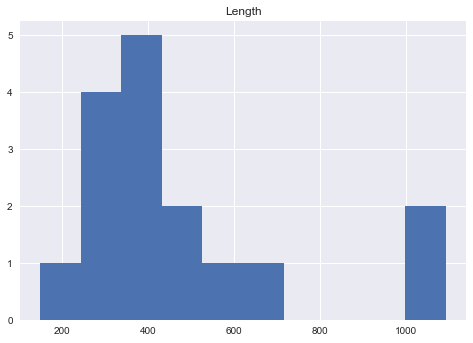

In [11]:
# Plot histogram from dataframe
df.hist();

<a id="excel"></a>
### Excel

You can download Excel spreadsheets directly from `UniProt`, just as with the browser interface.

```
result = service.search(query, frmt="xls")
```

You can't use the Excel output directly in your code without some file manipulation, and you'll have to save it to a file, as in the example below. Also, it may be that the downloaded format is not guarnateed to be current for your version of Excel, and the application may ask to repair it. But, if you want Excel output to share with/display to others, you can get it programmatically.

<div class="alert-danger">
<b>NOTE: the downloaded format is actually `.xlsx`, rather than `.xls` which is implied by the format</b>
</div>

In [12]:
# Make a query string, and run a remote search at UniProt,
# getting the result as an Excel spreadsheer
query = "Q01844"
result = service.search(query, frmt="xls")

# Write the Excel spreadsheet to file
outfile = os.path.join('output', 'uniprot', 'Q01844.xlsx')
with open(outfile, 'wb') as ofh:
    ofh.write(result)

In [13]:
service.get_df('Q01844').columns

Index(['Entry', 'Entry name', 'Gene names', 'Gene names  (primary )',
       'Gene names  (synonym )', 'Gene names  (ordered locus )',
       'Gene names  (ORF )', 'Organism', 'Organism ID', 'Protein names',
       'Proteomes', 'Taxonomic lineage (ALL)', 'Taxonomic lineage IDs',
       'Virus hosts', 'Sequence', 'Length', 'Mass', 'Gene encoded by',
       'Alternative products (isoforms)', 'Erroneous gene model prediction',
       'Erroneous initiation', 'Erroneous termination',
       'Erroneous translation', 'Frameshift', 'Mass spectrometry',
       'Polymorphism', 'RNA editing', 'Sequence caution',
       'Alternative sequence', 'Natural variant', 'Non-adjacent residues',
       'Non-standard residue', 'Non-terminal residue', 'Sequence conflict',
       'Sequence uncertainty', 'Version (sequence)', 'Domains', 'Domain count',
       'Domain [CC]', 'Sequence similarities', 'Coiled coil',
       'Compositional bias', 'Domain [FT]', 'Motif', 'Region', 'Repeat',
       'Zinc finger', 'EC